<a href="https://colab.research.google.com/github/Diwakerprashar/EDA-Datasets/blob/main/TF_2_0_MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()
X_train,X_test = X_train/255.0, X_test/255.0
print('X_train.shape: ',X_train.shape)

X_train.shape:  (60000, 28, 28)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8779 - loss: 0.4355 - val_accuracy: 0.9595 - val_loss: 0.1397
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9666 - loss: 0.1155 - val_accuracy: 0.9706 - val_loss: 0.0998
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9777 - loss: 0.0782 - val_accuracy: 0.9736 - val_loss: 0.0860
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9831 - loss: 0.0566 - val_accuracy: 0.9738 - val_loss: 0.0822
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0425 - val_accuracy: 0.9778 - val_loss: 0.0723
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9892 - loss: 0.0337 - val_accuracy: 0.9787 - val_loss: 0.0700
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9936 - loss: 0.0244 - val_accuracy: 0.9796 - val_loss: 0.0677
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9941 - loss: 0.020

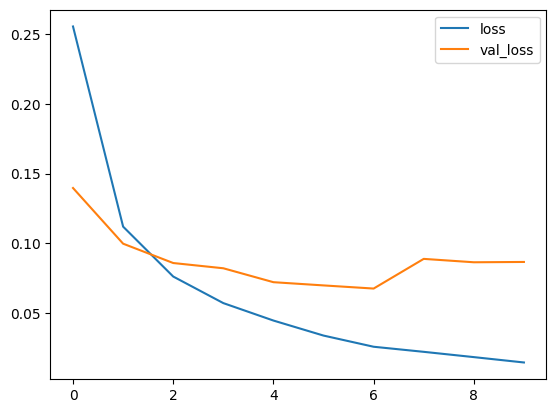

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

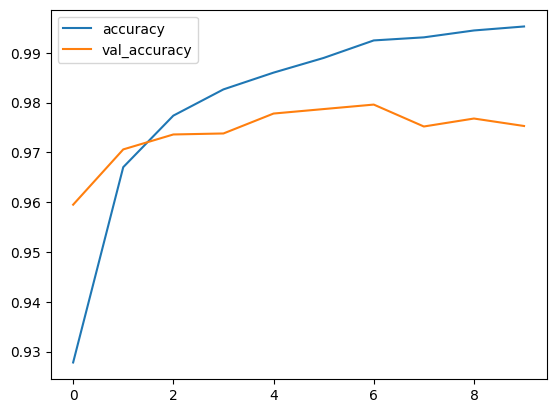

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
print(model.evaluate(X_test,y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9703 - loss: 0.1037
[0.08676336705684662, 0.9753000140190125]


In [ ]:
import numpy as np

In [ ]:
p_test = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(0.5, 1.0, 'True lable: 9 Predicted Label: 4')

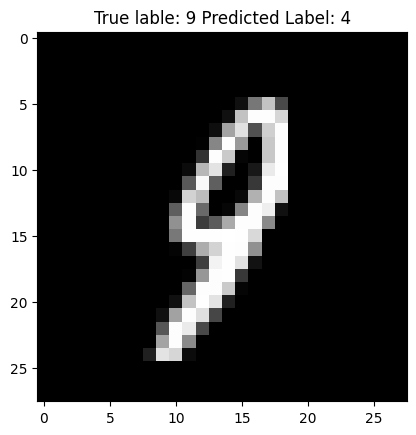

In [ ]:
misclassified_idx =np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap ='gray')
plt.title("True lable: %s Predicted Label: %s" %(y_test[i],p_test[i]))